In [ ]:
#pip install PyTDC   # precisam disto para correr o codigo 
#pip install rdkit seaborn matplotlib umap-learn imbalanced-learn  numpy pandas PyTDC
#pip install -U scikit-learn

import seaborn as sns
from tdc.multi_pred import DTI

# para correr a parte de baixo é preciso definir as test/ train 

In [4]:
data_K = DTI(name = 'KIBA')

Found local copy...
Loading...
Done!


In [5]:
data_K.get_data().head()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,11.1
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,11.1
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,11.1
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,11.1
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,11.1


In [6]:
data_K.print_stats()

--- Dataset Statistics ---
2068 unique drugs.
229 unique targets.
117657 drug-target pairs.
--------------------------


In [7]:
data_K.get_data().isnull().sum()

Drug_ID      0
Drug         0
Target_ID    0
Target       0
Y            0
dtype: int64

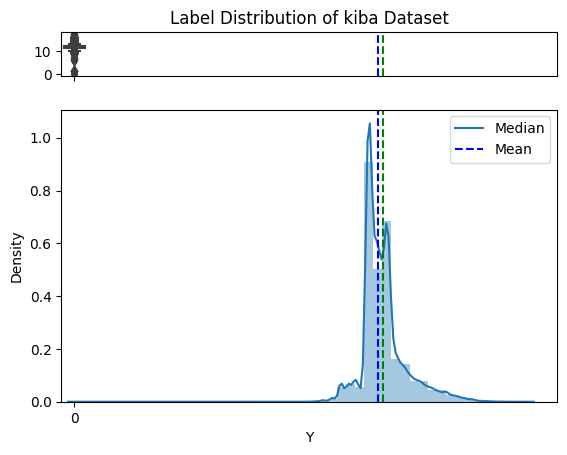

In [8]:
data_K.label_distribution()

In [9]:
data_K.get_data().Y.describe()

count    117657.000000
mean         11.720685
std           0.834272
min           0.000000
25%          11.200000
50%          11.520216
75%          11.923909
max          17.200179
Name: Y, dtype: float64

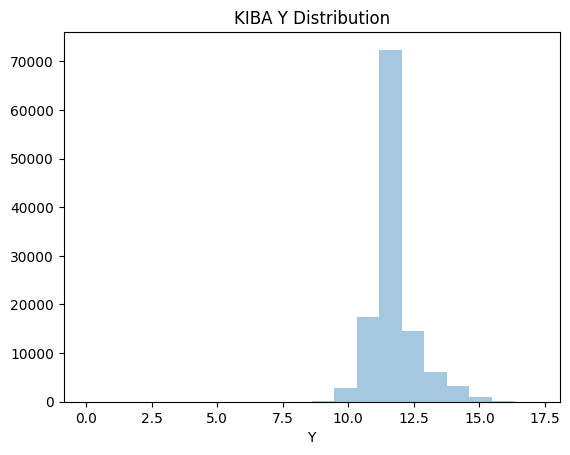

In [10]:
Y_plot = sns.distplot(data_K.get_data().Y, kde=False, bins=20).set_title('KIBA Y Distribution')

In [11]:
data_K.get_data().Drug.describe()

count                                                117657
unique                                                 2068
top       CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)c...
freq                                                    166
Name: Drug, dtype: object

Text(0.5, 1.0, 'KIBA Drug Length Distribution')

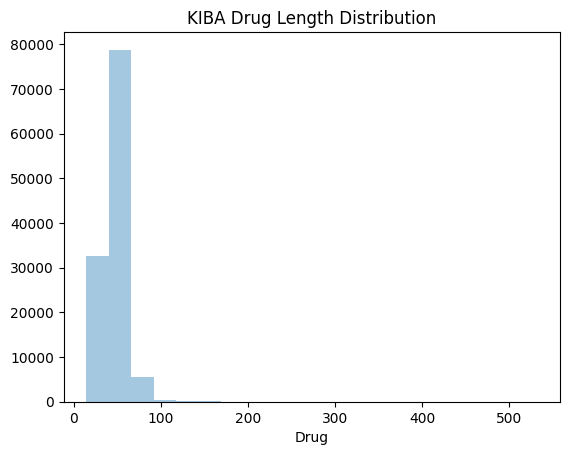

In [12]:
sns.distplot(data_K.get_data().Drug.str.len(), kde=False, bins=20).set_title('KIBA Drug Length Distribution')

In [13]:
data_K.get_data().Target.describe()

count                                                117657
unique                                                  229
top       MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...
freq                                                   1432
Name: Target, dtype: object

Text(0.5, 1.0, 'KIBA Target Length Distribution')

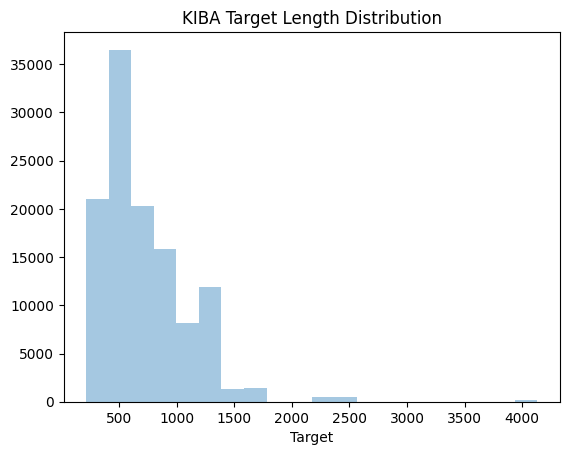

In [14]:
sns.distplot(data_K.get_data().Target.str.len(), kde=False, bins=20).set_title('KIBA Target Length Distribution')

In [15]:
data_K.get_data().Drug.str.len().describe()

count    117657.000000
mean         46.751566
std          13.839408
min          14.000000
25%          39.000000
50%          45.000000
75%          54.000000
max         532.000000
Name: Drug, dtype: float64

Text(0.5, 1.0, 'KIBA Drug Length Distribution')

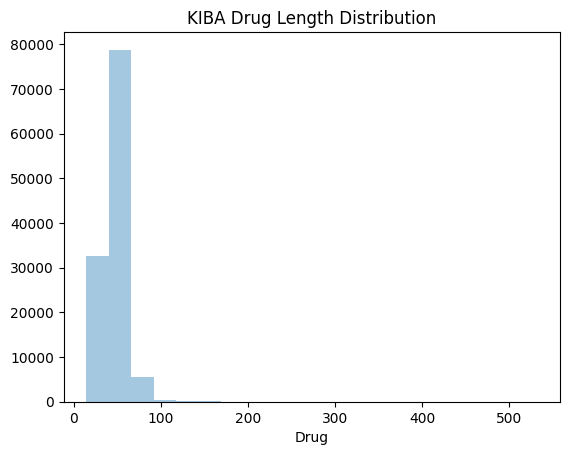

In [16]:
sns.distplot(data_K.get_data().Drug.str.len(), kde=False, bins=20).set_title('KIBA Drug Length Distribution')

In [17]:
# preprocess data Binarization

data_K = DTI(name = 'KIBA')
data_K.binarize(threshold = 12.1) # veio da literatura

Found local copy...
Loading...
Done!
Binariztion using threshold 12.1, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


In [18]:
data_K.get_data().Y.describe()

count    117657.000000
mean          0.790416
std           0.407013
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Y, dtype: float64

Text(0.5, 1.0, 'KIBA Y Distribution')

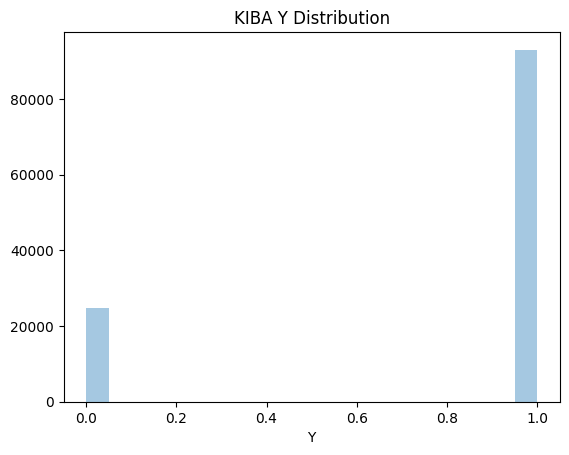

In [19]:
sns.distplot(data_K.get_data().Y, kde=False, bins=20).set_title('KIBA Y Distribution')

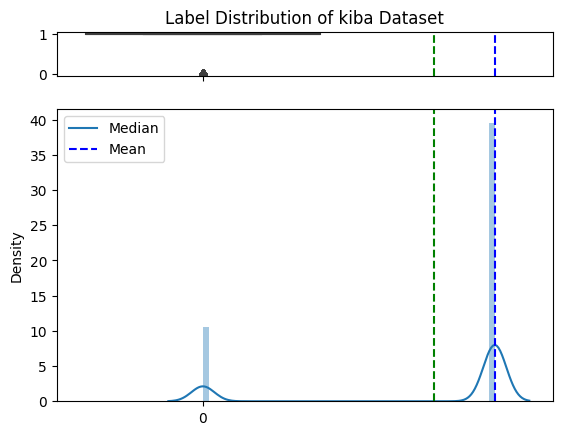

In [20]:
data_K.label_distribution()

In [21]:
data_K.get_data().Y.describe()

count    117657.000000
mean          0.790416
std           0.407013
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Y, dtype: float64

In [22]:
df = data_K.get_data(format = 'df')
df

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,1
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,1
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,1
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,1
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,1
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,1
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,1
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,1


# data aqui , train, test

In [28]:
train = data_K.get_split()["train"]
valid = data_K.get_split()["valid"]
test = data_K.get_split()["test"]


In [25]:
data = train[["Drug", "Y"]] # data 
data.head()

,Drug,Y
0,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,1
1,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,1
2,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,1
3,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,1
4,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,1


In [29]:
test_data = test[['Drug', 'Y']]
test_data.head()

,Drug,Y
0,CN(C)CC(=O)NC(COc1cncc(-c2ccc3cnccc3c2)c1)Cc1c...,1
1,COc1cc(CN2CCCCC2)c(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,1
2,CCCOc1cccc(C(C)NC(=O)c2ccc(-c3ccncc3)cc2)c1,1
3,COC1C(N(C)C)CC2OC1(C)n1c3ccccc3c3c4c(c5c6ccccc...,1
4,NC(=O)c1ccc(-c2ccncc2)cc1NCc1ccccc1,1


In [26]:
data.Y.value_counts()

1    92998
0    24659
Name: Y, dtype: int64

In [27]:
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import Chem, RDLogger

RDLogger.DisableLog('rdApp.*') # disable rdkit warnings


def standardize(smiles):
    # convert to mol object
    mol = Chem.MolFromSmiles(smiles)
    
    # avoid errors with invalid molecules
    if mol is None:
        return None
     
    # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
    clean_mol = rdMolStandardize.Cleanup(mol) 
     
    # if many fragments, get the "parent" (the actual mol we are interested in) 
    parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
         
    # try to neutralize molecule
    uncharger = rdMolStandardize.Uncharger()
    uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
    # convert back to smiles
    uncharged_parent_clean_smiles = Chem.MolToSmiles(uncharged_parent_clean_mol)
    return uncharged_parent_clean_smiles

# apply the function to the SMILES column
standardized_data = data.copy().apply(lambda x: standardize(x['Drug']), axis=1)
standardized_data.head()

KeyboardInterrupt: 

In [ ]:
# save the standardized  data dtype: object and load it back keeping the dtype as object with pickle













In [ ]:
# create features from SMILES

import pandas as pd
import numpy as np
from rdkit.Chem.GraphDescriptors import Ipc
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

# 2D descriptors
def get_descriptors(smiles):
    feature_names = [x[0] for x in Descriptors._descList]
    try:
        mol = Chem.MolFromSmiles(smiles)
        calc = MoleculeDescriptors.MolecularDescriptorCalculator(feature_names)
        # Deal with very large/inf values of the Ipc descriptor (https://github.com/rdkit/rdkit/issues/1527)
        # find position of Ipc
        pos = feature_names.index("Ipc")
        # calculate AvgIpc
        avg_ipc = Ipc(mol, avg=1)

        descriptors = list(calc.CalcDescriptors(mol))
        # replace Ipc with AvgIpc
        descriptors[pos] = avg_ipc
        descriptors = np.array(descriptors, dtype=np.float32)
        return descriptors
    except:
        # return np array of nans of size feature_names
        return np.empty(len(feature_names)) * np.nan

# calculate descriptors
descriptors = standardized_data.apply(lambda x: get_descriptors(x))
# convert to dataframe
descriptors = pd.DataFrame(descriptors.values.tolist(), columns=[x[0] for x in Descriptors._descList])
descriptors.head()



In [ ]:
# save the descriptors

descriptors.to_csv('descriptors.csv', index=False)

# load the descriptors

descriptors = pd.read_csv('descriptors.csv')


In [ ]:
# Morgan fingerprints
from rdkit.Chem import AllChem

def get_morgan_fingerprints(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        morgan_fingerprints = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
        return np.array(morgan_fingerprints, np.float32)
    except:
        # return np array of nans of size feature_names
        return np.empty(1024) * np.nan

# calculate morgan fingerprints
morgan_fingerprints = standardized_data.apply(lambda x: get_morgan_fingerprints(x))
# convert to dataframe
morgan_fingerprints = pd.DataFrame(morgan_fingerprints.values.tolist(), columns=[f'morgan_{i}' for i in range(1024)])
morgan_fingerprints.head()

In [ ]:
# save the morgan fingerprints

morgan_fingerprints.to_csv('morgan_fingerprints.csv', index=False)

# load the morgan fingerprints

morgan_fingerprints = pd.read_csv('morgan_fingerprints.csv')



In [ ]:
# shape of the dataframes
print(descriptors.shape, morgan_fingerprints.shape)
# Remove rows where all values are nan
descriptors = descriptors.dropna(how='all')
# don't forget to drop the same rows from the y column
y_descriptors = data.Y.copy()[descriptors.index]

# we do the same for morgan_fingerprints
morgan_fingerprints = morgan_fingerprints.dropna(how='all')
y_morgan = data.Y.copy()[morgan_fingerprints.index]
# as we can see, the shapes are the same, because there was no invalid molecule
descriptors.shape, y_descriptors.shape, morgan_fingerprints.shape, y_morgan.shape

In [ ]:
# Check if there is columns with nan values (we have 12 nan in the descriptors dataframe)
descriptors.isna().any().sum(), morgan_fingerprints.isna().any().sum() # there are no nan values (these featurizers don't produce nan values)

In [ ]:
# Impute nan values with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # we can also use median or most_frequent
descriptors = imputer.fit_transform(descriptors)
descriptors = pd.DataFrame(descriptors, columns=[x[0] for x in Descriptors._descList])
descriptors.isna().any().sum()

In [ ]:
from sklearn.preprocessing import StandardScaler

# scale descriptors data with StandardScaler
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(descriptors)
scaled_descriptors

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors = selector.fit_transform(scaled_descriptors)
selected_columns = descriptors.columns[selector.get_support()]
selected_descriptors.shape, selected_columns # as we can see, 7 descriptors were removed (208 to 201)

In [ ]:
# UMAP
import umap

# create UMAP object
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation', random_state=42)
# fit UMAP
umap_obj.fit(selected_descriptors)

In [ ]:
# plot UMAP
import seaborn as sns

sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1], hue=y_descriptors)

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

# create TSNE object
tsne_obj = TSNE(n_components=2, perplexity=30, random_state=42)
# fit TSNE
tsne_obj.fit(selected_descriptors)

In [ ]:
# plot TSNE
sns.scatterplot(x=tsne_obj.embedding_[:, 0], y=tsne_obj.embedding_[:, 1], hue=y_descriptors)

# Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

# We already have our split, but otherwise we could easily do it with sklearn:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_descriptors, y_descriptors, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # as we can see, we have 13316 training samples and 3329 test samples

# Unbalanced data

In [ ]:
# Get unbalanced data for unbalanced example
unbalanced_data = data.copy()
unbalanced_data = pd.concat([unbalanced_data[unbalanced_data.Y == 1], unbalanced_data[unbalanced_data.Y == 0][:100]])
unbalanced_data.Y.value_counts() # we can see that now we have 2124 active and 100 inactive

In [ ]:
# use smote to balance the data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts() # now the data is balanced

In [ ]:
# standardize test data
standardized_test_data = test_data.copy().apply(lambda x: standardize(x['Drug']), axis=1)
# calculate descriptors
descriptors_test = standardized_test_data.apply(lambda x: get_descriptors(x))
# convert to dataframe
descriptors_test = pd.DataFrame(descriptors_test.values.tolist(), columns=[x[0] for x in Descriptors._descList])
# impute nan values with mean
descriptors_test = imputer.transform(descriptors_test)
descriptors_test = pd.DataFrame(descriptors_test, columns=[x[0] for x in Descriptors._descList])
# scale descriptors data with StandardScaler
scaled_descriptors_test = scaler.transform(descriptors_test)
# select features with variance > 0.01
selected_descriptors_test = selector.transform(scaled_descriptors_test)
selected_descriptors_test.shape

In [ ]:
# save the standardized test data

standardized_test_data.to_csv('standardized_test_data.csv', index=False)

# load the standardized test data

standardized_test_data = pd.read_csv('standardized_test_data.csv')

# save the descriptors test

descriptors_test.to_csv('descriptors_test.csv', index=False)

# load the descriptors test

descriptors_test = pd.read_csv('descriptors_test.csv')




# ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = selected_descriptors
y_train = y_descriptors
X_test = selected_descriptors_test
y_test = test_data.Y.copy()  # arranjar o y_test em cima 

# Let's try a simple logistic regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

In [ ]:
from pprint import pprint

# accuracy on test set
logreg.score(X_test, y_test)

# other metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = logreg.predict(X_test)
pprint(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# train and test multiple models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = [LogisticRegression(random_state=42, max_iter=1000),
          RandomForestClassifier(random_state=42),
          SVC(random_state=42, probability=True),
          KNeighborsClassifier()]

for model in models:
    model.fit(X_train, y_train)
    print(model.__class__.__name__)
    print('Accuracy on test set:', model.score(X_test, y_test))
    print('Classification report:\n', classification_report(y_test, model.predict(X_test)))
    print('Confusion matrix:\n', confusion_matrix(y_test, model.predict(X_test)))
    print('ROC AUC score:', roc_auc_score(y_test, model.predict_proba(X_test)[::,1]))
    print('-------------------')

In [ ]:
# Ensemble methods
from sklearn.ensemble import VotingClassifier

# create a dictionary of our models
estimators=[('logreg', logreg), ('rf', RandomForestClassifier(random_state=42)), ('svc', SVC(random_state=42, probability=True)), ('knn', KNeighborsClassifier())]
# create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
# fit model to training data
ensemble.fit(X_train, y_train)
# test our model on the test data
ensemble.score(X_test, y_test)
print('Accuracy on test set:', ensemble.score(X_test, y_test))
print('Classification report:\n', classification_report(y_test, ensemble.predict(X_test)))
print('Confusion matrix:\n', confusion_matrix(y_test, ensemble.predict(X_test)))
print('ROC AUC score:', roc_auc_score(y_test, ensemble.predict_proba(X_test)[::,1]))

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
print('Accuracy on test set:', bagging.score(X_test, y_test))
print('Classification report:\n', classification_report(y_test, bagging.predict(X_test)))
print('Confusion matrix:\n', confusion_matrix(y_test, bagging.predict(X_test)))
print('ROC AUC score:', roc_auc_score(y_test, bagging.predict_proba(X_test)[::,1]))

In [ ]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
print('Accuracy on test set:', adaboost.score(X_test, y_test))
print('Classification report:\n', classification_report(y_test, adaboost.predict(X_test)))
print('Confusion matrix:\n', confusion_matrix(y_test, adaboost.predict(X_test)))
print('ROC AUC score:', roc_auc_score(y_test, adaboost.predict_proba(X_test)[::,1]))

In [ ]:
# Stacking
from sklearn.ensemble import StackingClassifier

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42, max_iter=1000))
stacking.fit(X_train, y_train)
print('Accuracy on test set:', stacking.score(X_test, y_test))
print('Classification report:\n', classification_report(y_test, stacking.predict(X_test)))
print('Confusion matrix:\n', confusion_matrix(y_test, stacking.predict(X_test)))
print('ROC AUC score:', roc_auc_score(y_test, stacking.predict_proba(X_test)[::,1]))

# Model Validation

In [ ]:
# Model validation
from sklearn.model_selection import cross_val_score

# cross validation
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print('Cross validation scores:', scores)
print('Mean cross validation score:', scores.mean())

In [ ]:
# Bootstrap
from sklearn.utils import resample

# bootstrap
scores = []
for i in range(1000):
    X_boot, y_boot = resample(X_train, y_train)
    logreg.fit(X_boot, y_boot)
    scores.append(logreg.score(X_test, y_test))
    
print('Mean bootstrap score:', np.mean(scores))
print('Standard deviation of bootstrap scores:', np.std(scores))

## Hyperparameter tuning


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# random forest hyperparameter tuning
param_grid = {'n_estimators': [10, 100, 1000],
              'max_depth': [None, 5, 10, 20],
              'max_features': ['auto', 'sqrt'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

rf = RandomForestClassifier(random_state=42)
rand_search = RandomizedSearchCV(rf, param_grid, cv=5, verbose=2, n_jobs=-1, n_iter=5)
rand_search.fit(X_train, y_train)
rand_search.best_params_, rand_search.best_score_, rand_search.best_estimator_.score(X_test, y_test)
# grid_search.best_estimator_ # best model

# Save best Model

In [ ]:
# save the best model
import joblib

joblib.dump(rand_search.best_estimator_, 'best_model.pkl')

# load the best model
best_model = joblib.load('best_model.pkl')
best_model.score(X_test, y_test)

# Model interpretation

In [ ]:
# Model interpretation
# feature importance
rf = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=10, max_features='sqrt', min_samples_split=5, min_samples_leaf=2)
rf.fit(X_train, y_train)
rf.feature_importances_

# plot feature importance
importances = pd.Series(rf.feature_importances_, index=selected_columns)
importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# feature importance based on permutation importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(selected_columns[sorted_idx[:10]], perm_importance.importances_mean[sorted_idx[:10]])
plt.xlabel("Permutation Importance")
plt.show()

In [ ]:
pos_neg_idx = np.concatenate((sorted_idx[:10], sorted_idx[-10:]))
plt.barh(selected_columns[pos_neg_idx], perm_importance.importances_mean[pos_neg_idx])
plt.xlabel("Permutation Importance")
plt.show()

# Section 2



In [ ]:
# pca 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


df

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,1
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,1
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,1
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,1
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,1
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,1
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,1
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,1
